# CISC/CMPE 452/COGS 400 Assignment 1 - Perceptron (10 points)  

Please put your name and student id here

    FirstName LastName, #12345678

- The notebook file has clearly marked blocks where you are expected to write code. Do not write or modify any code outside of these blocks.
- Make sure to restart and run all the cells from the beginning before submission. Do not clear out the outputs.
- Mark will be deducted based on late policy (-1% of the course total marks per day after due date until the end date after which no assignments will be accepted)



### Build Model (6 points)  
Implement **Simple Feedback Learning** for emotion classification (dataset from: https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp)

Use the correct/incorrect feedback and info about (y>d) or (y<d) to change weights.  
Refer to the **Perceptron slides**  

- 1. Implement forward and calculate the output (2 point)  
- 2. Update the weights and bias (2 points)  
- 3. Predict function (1 point)  
- 4. Activation function (1 point)  

### Evaluator Function (2 point)  
Implement the evaluator function with Pytorch or Numpy only   
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Train and Evaluate the Model (2 point)  
Train the model with customized learning rate and number of iterations  
Use the predict function to predict the labels with the test dataset  
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score


In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [335]:
# load dataset
df_train = pd.read_csv('data/train.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('data/test.txt', names=['Text', 'Emotion'], sep=';')

In [336]:
x_train = df_train['Text']
y_train = df_train['Emotion']

x_test = df_test['Text']
y_test = df_test['Emotion']

df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [337]:
df_train.Emotion.value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

## Data Preprocessing

In [338]:
# encode label
y_train = y_train.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})
y_test = y_test.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})

In [339]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5)#, stop_words='english')

# We transform each text into a vector
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [340]:
def evaluator(y_test, y_pred):

    # enter code here to implement the evaluation matrices including confusion matrix, accuracy, precision, recall and f1
    # DO NOT use any python packages such as scikit-learn
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    for t_val,p_val in zip(y_test,y_pred):
        #this is the case for true positive
        if (t_val == 1) and (t_val == p_val):
            true_pos += 1
        #this is the case for false negative.
        elif (t_val == 1) and (t_val != p_val):
            false_neg += 1
        #this is the case for true negative.
        elif (t_val == 0) and (t_val == p_val):
            true_neg += 1
        #this is the case for false positive.
        elif (t_val == 0) and (t_val != p_val):
            false_pos += 1
    
    confusion_mat = [[true_pos, false_pos],[false_neg,true_neg]]
    #caculate precision
    precision = true_pos / (true_pos+false_pos)
    #calculate recall
    recall = true_pos / (true_pos+false_neg)
    #calculate accuracy
    accuracy = (true_pos + true_neg) / (true_pos+false_pos+true_neg+false_neg)
    #calculate f1 score
    f1 = 2 * (precision * recall) / (precision + recall)


    return confusion_mat, precision, recall, accuracy, f1

In [341]:
class SimpleFeedbackLearning(object):
    def __init__(self):
        self.history = {}
        self.history['train_acc'] = []
        self.history['test_acc'] = []
        
    def f(self, x):
        ####################################################################################################
        # 4. enter code here to implement the activation function
        #starting from 0, by increasing it by 0.1, threshold value of 0.3 results in better f1 score
        if x > 0.3:
            fx = 1
        else:
            fx = 0

        ####################################################################################################
        return fx
    
    def train(self, x, y, x_test, y_test, learning_rate=0.1, n_iters=10, verbose=True):
        n_train, input_size = x.shape
        n_test = x_test.shape[0]
        # weight initialization
        self.W = np.zeros(input_size)
        self.b = np.zeros(1)
        #this for loop will adjust weight and bias.
        for i in range(n_iters):
            for xi, yi in zip(x, y):
                # forward
                ####################################################################################################
                # 1. enter code here to calculate the output
                # rslt is dot product of xi and the weight and bias is added.
                rslt = self.f(np.dot(xi, self.W) + self.b)
                
                ####################################################################################################

                ####################################################################################################
                # 2. enter code here to adjust the weights and bias
                #if rslt is larger than yi, the weight and bias increase.
                #else, the weight and bias decrease.
                if rslt > yi:
                    self.W = self.W - learning_rate * xi
                    self.b = self.b - learning_rate
                else:
                    self.W = self.W + learning_rate * xi
                    self.b = self.b + learning_rate
                ####################################################################################################
            train_acc = (self.predict(x) == y).sum() / n_train
            test_acc = (self.predict(x_test) == y_test).sum() / n_test
            self.history['train_acc'].append(train_acc)
            self.history['test_acc'].append(test_acc)
            if verbose:
                print('epoch %d, train acc %.4f, test acc %.4f' % (i + 1, train_acc, test_acc))

    def predict(self, x):
        ####################################################################################################
        # 3. enter code here to complete the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        y_pred = []
        #it uses adjusted weight and bias to predict y value.
        for xi in x:
            y = self.f(np.dot(xi,self.W)+self.b)
            y_pred.append(y)
        

        ####################################################################################################
        return y_pred

In [342]:
####################################################################################################
# enter code here to initialize and train the model
sfl = SimpleFeedbackLearning()
sfl.train(x_train,y_train,x_test,y_test, learning_rate=0.1, n_iters=10, verbose=True)
y_pred=sfl.predict(x_train)

####################################################################################################


epoch 1, train acc 0.4804, test acc 0.4820
epoch 2, train acc 0.5091, test acc 0.5120
epoch 3, train acc 0.5237, test acc 0.5245
epoch 4, train acc 0.5332, test acc 0.5305
epoch 5, train acc 0.5288, test acc 0.5250
epoch 6, train acc 0.5188, test acc 0.5195
epoch 7, train acc 0.5241, test acc 0.5215
epoch 8, train acc 0.5223, test acc 0.5205
epoch 9, train acc 0.5265, test acc 0.5250
epoch 10, train acc 0.5250, test acc 0.5235


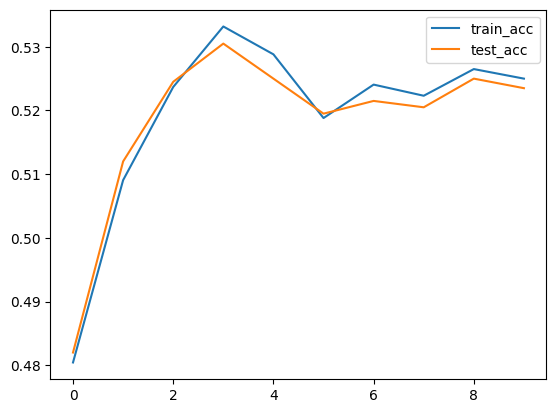

In [343]:
# plot the accuracy
plt.plot(model.history['train_acc'], label='train_acc')
plt.plot(model.history['test_acc'], label='test_acc')
plt.legend()
plt.show()

In [344]:
####################################################################################################
# enter code here to evaluate the model with the evaluator function
evaluator(y_test, y_pred)

####################################################################################################

([[856, 1008], [64, 72]],
 0.4592274678111588,
 0.9304347826086956,
 0.464,
 0.6149425287356322)